# Introduction to Quantum Computing
Quantum computing is a field of study that uses principles of the quantum theory to develop computer technology. Quantum theory is *"the area of physics that explains how matter and energy behave at the atomic and subatomic level"*. 

Quantum computing differs from classical computers in many ways.

|                               | Classical Computers                           | Quantum Computers                                             |
| :---                          | :---                                          | :---                                                          |
| **Unit of Information**       | Bits                                          | Qubits                                                        |
| **Superposition**             | No superposition (0 or 1 state)               | Superposition of 0 and 1 states simultaneously                |
| **Entanglement**              | Independent bits                              | Entangled qubits                                              |
| **Gates**                     | Classical logic gates (AND, OR, NOT)          | Quantum gates (manipulate qubits quantum states)              |
| **Processing Model**          | Sequential processing                         | Parallel processing, exploring multiple possibilities         |
| **Complexity and Speed**      | Efficient for general problems                | Exponential speedup for specific problems                     |
| **Error Sensitivity**         | Relatively stable                             | Susceptible to errors, active research on error correction    |

## Qubits
Classical bits can only be in two states: 1 and 0. Qubits on the other hand can have multiple states at once thanks to a propery called *superposition*. Superposition allows quantum systems to process a large amount of information at once.

Here are the possible states of a qubit:
$$
\begin{array}{c|cc}
& 0&1 \\
\hline
0 & 00&01 \\
1 & 10&11
\end{array}
$$

As you can see we can have multiple states at the same time, this lets qubits represent more information than a classical bit. 

Here are the possible states of a classical bit:

$$
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$$


## Comparing bits and qubits

|                      | **Bits**                    | **Qubits**                                          |
| :---                 | :---                        | :---                                                |
| **States**           | Can be 0 or 1               | Can be 0, 1, or both 0 and 1 at the same exact time |
| **Processing Power** | Linear processing, 0(n)     | Exponential processing because of superposition     |
| **Parallelism**      | Process tasks sequentially  | Parallel processing due to superposition            |
| **Complexity**       | Straightforward logic gates | Complex quantum operations                          |
| **Sensitivity**      | Stable, not quantum         | Highly sensitive to the environment                 |



## Quantum Gates
Quantum gates can measure and change the superposition state of qubits. This allows for parallel processing of multiple different possibilities, whereas the logic gates have only a possibility of returning a 0 or 1. Quantum gates can alter the entanglement of qubits which means one qubit's superposition can be related to another one even if they are physically seperate

A quantum logic gate is represented using matrices where for n qubits the matrix is: 
$$2^n\times 2^n$$

An example of a quantum gate is a Hadamard gate. The Hadamard gate is one of the most fundamental gates in quantum computing. It is often denoted by the letter H. The Hadamard gate operates on a single qubit and is typically used to create superposition. This means that when this gate is applied to a qubit in a state of |0) or |1), the gate transforms it into an equal superposition of |0) and |1)

|0) and |1) are the representations of the state of a qubit in quantum computing. These indicate that if a qubit in the state of |0) has a probability of 100% to have the value 0, same goes for |1)

The Hadamard gate can be represented by the following matrix:
$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
$$




## Generating circuits
This basic circuit consists of two qubits. 
One H gate in the first qubit and a CNOT gate going through both.

In [1]:
# Importing libraries for generating the circuits
import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

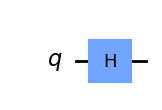

In [8]:
circ = QuantumCircuit(1) # Generate a circuit with one qubits
circ.h(0) # Add a H gate to the first qubit
circ.draw('mpl', style="clifford") # Draw the circuit

## Getting the Result of the Circuit

Bell-State counts can help us calculate the results of running this circuit. These counts provide information about the probabilities of different measurement results and allow us to infer the entanglement and correlations between the qubits.

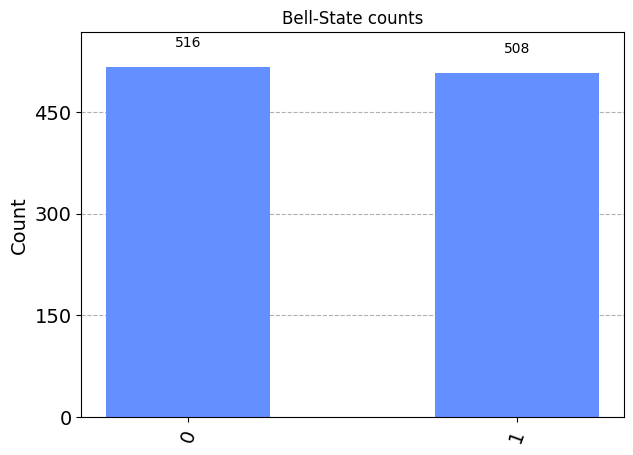

In [9]:
circ.measure_all()
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

# Deautsch's Algorithm

Deutsch's algorithm is one of the earliest and simplest quantum algorithms that demonstrates the power of quantum computing in solving certain types of problems more efficiently than classical computers. It was proposed by David Deutsch in 1985 and is often considered a foundational algorithm in quantum computing.

## Deutsch's Problem
The problem that Deutsch's algorithm addresses is known as the Deutsch problem, which is an example of a black-box problem. In this problem, we are given a black box that performs an unknown function on a single qubit. The function takes a binary input (0 or 1) and produces a binary output (0 or 1). The goal is to determine whether the function is constant (output is the same for both input values) or balanced (output is different for the two input values) by making as few function evaluations as possible.

Deutsch's algorithm solves this problem using only one function evaluation. In the classical setting, at least two function evaluations are required to distinguish between a constant and a balanced function. However, Deutsch's algorithm exploits quantum parallelism and interference to determine the nature of the function in a single evaluation.

The algorithm starts with two qubits, one in the state |0⟩ and the other in the state |1⟩, representing the input to the black box. It then applies a series of quantum gates, including a Hadamard gate and an oracle gate that performs the unknown function. The algorithm applies further gates to extract the result, and finally measures the first qubit to obtain the outcome.

After the measurement, Deutsch's algorithm can determine whether the function is constant or balanced by analyzing the measurement result. Remarkably, the algorithm correctly identifies the nature of the function with only a single function evaluation, making it exponentially more efficient than classical algorithms for solving this specific problem.

Deutsch's algorithm serves as a crucial demonstration of the advantage of quantum computing in terms of solving certain problems more efficiently. While it may not have immediate practical applications, it lays the foundation for more advanced quantum algorithms and showcases the unique capabilities of quantum computers.


## Constant and Balanced Functions

### Classical Computing
A balanced function in classical computing is one that returns the same amount of 0s and 1s. An example would be the XOR gate. 
| Input 1 | Input 2 | Output |
|:-------:|:-------:|:------:|
|    0    |    0    |   0    |
|    0    |    1    |   1    |
|    1    |    0    |   1    |
|    1    |    1    |   0    |

A constant function in classical computing is one that returns the same result each time. An example would be the NOT gate.
| Input 1 | Input 2 | Output |
|:-------:|:-------:|:------:|
|    0    |    0    |   0    |
|    0    |    1    |   0    |
|    1    |    0    |   0    |
|    1    |    1    |   0    |



## Algorithm Implementation

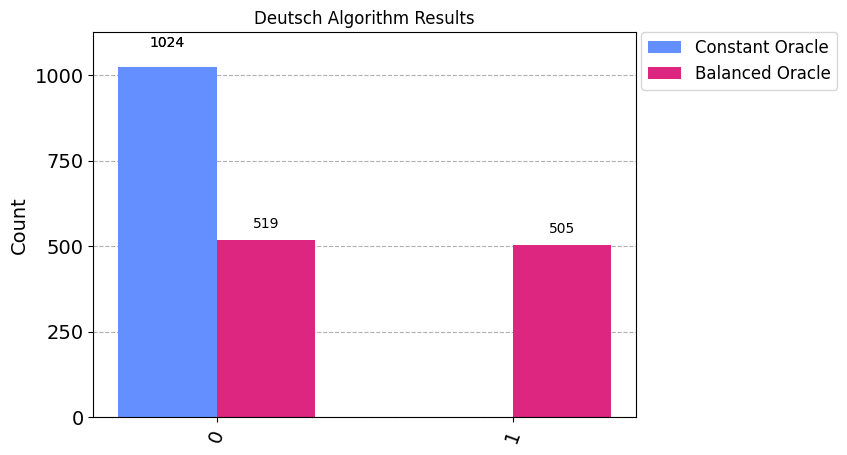

In [25]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

def deutsch_algorithm(oracle_type):
    #Create a quantum circuit with two qubits and one classical bit for storing results
    circuit = QuantumCircuit(2, 1)

    #Apply Hadamard gate on both qubits
    circuit.h([0, 1])

    #Apply X and H gate on the second qubit, creating the |1) state
    circuit.x(1)
    circuit.h(1)

    #Apply the Deutsch oracle based on the given type
    if oracle_type == 'balanced':
        circuit.cx(0, 1)  #Apply CNOT gate to balanced oracle

    #Apply H gate on the first qubit
    circuit.h(0)

    #Measure the first qubit and store the result in classical bit
    circuit.measure(0, 0)

    return circuit

simulator = Aer.get_backend('qasm_simulator')
constant_circuit = transpile(deutsch_algorithm('constant'), simulator)
balanced_circuit = transpile(deutsch_algorithm('balanced'), simulator)

constant_result = simulator.run(constant_circuit).result()
balanced_result = simulator.run(balanced_circuit).result()

plot_histogram([constant_result.get_counts(), balanced_result.get_counts()],
               legend=['Constant Oracle', 'Balanced Oracle'],
               title='Deutsch Algorithm Results')


In the resulting histogram, you should observe two bars corresponding to the '0' and '1' outcomes. The heights of these bars represent the frequency of each outcome after running the algorithm multiple times.

For the Constant Oracle, you should see a histogram with a single bar at 0 and a count of 1024 (the total number of shots or measurements).
For the Balanced Oracle, you should see a histogram with bars at both 0 and 1, each with approximately half the count (around 512 each).